primeiro baixar o dataset do [kaggle](https://www.kaggle.com/datasets/fredericods/ptbr-sentiment-analysis-datasets?select=b2w.csv)

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

avaliacoes = pd.read_csv('https://media.githubusercontent.com/media/rivervaladao/FIAP-POS-TECH/master/IA_PLN/datasets/b2w.csv')
avaliacoes.describe()


,original_index,polarity,rating,kfold_polarity,kfold_rating
count,132373.000000,116058.000000,132373.000000,132373.000000,132373.000000
mean,66186.000000,0.691895,3.492004,4.698813,5.499921
std,38212.937929,0.461712,1.530289,3.434905,2.872311
min,0.000000,0.000000,1.000000,-1.000000,1.000000
25%,33093.000000,0.000000,2.000000,2.000000,3.000000
50%,66186.000000,1.000000,4.000000,5.000000,5.000000
75%,99279.000000,1.000000,5.000000,8.000000,8.000000
max,132372.000000,1.000000,5.000000,10.000000,10.000000


removendo linhas desnecessárias e not a numbers

In [62]:
avaliacoes.drop(["original_index", "review_text_processed", "review_text_tokenized", "rating", "kfold_polarity", "kfold_rating"], axis=1)


,review_text,polarity
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0
1,Produto excepcional! recomendo!!! inovador e ...,1.0
2,recebi o produto antes do prazo mas veio com d...,0.0
3,Bom custo beneficio. Adequado para pessoas que...,1.0
4,Além de higiênico tem o tamanho ideal. Só falt...,NaN
...,...,...
132368,SMARTHPHONE PERFEITO MUITO BOM E A ECONO...,1.0
132369,Eu estou muito chateado com isso gostaria que ...,0.0
132370,"Vale a pena pelo preço oferecido, qualidade a ...",NaN
132371,O produto anunciado no site dizia ser 100% al...,0.0


In [63]:
avaliacoes.dropna(inplace=True,axis = 0)


In [64]:
avaliacoes.polarity.value_counts()

,count
polarity,
1.0,80300
0.0,35758


In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(avaliacoes.review_text,avaliacoes.polarity, stratify=avaliacoes.polarity, test_size=0.2, random_state=42)

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vx_train = vectorizer.fit_transform(x_train)
vx_test = vectorizer.transform(x_test)

from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(vx_train, y_train)
accurancy = regressor.score(vx_test, y_test)
print(accurancy)


0.9430466999827676


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Montando Word Cloud

In [67]:
!pip install wordcloud


In [68]:
from wordcloud import WordCloud
positive_aval = ' '.join([text for text in avaliacoes.query("polarity == 1").review_text])
negative_aval = ' '.join([text for text in avaliacoes.query("polarity == 0").review_text])
negative_wc = WordCloud(width=800, height=500, random_state=21, max_font_size=110, collocations=False).generate(negative_aval)
positive_wc = WordCloud(width=800, height=500, random_state=21, max_font_size=110, collocations=False).generate(positive_aval)


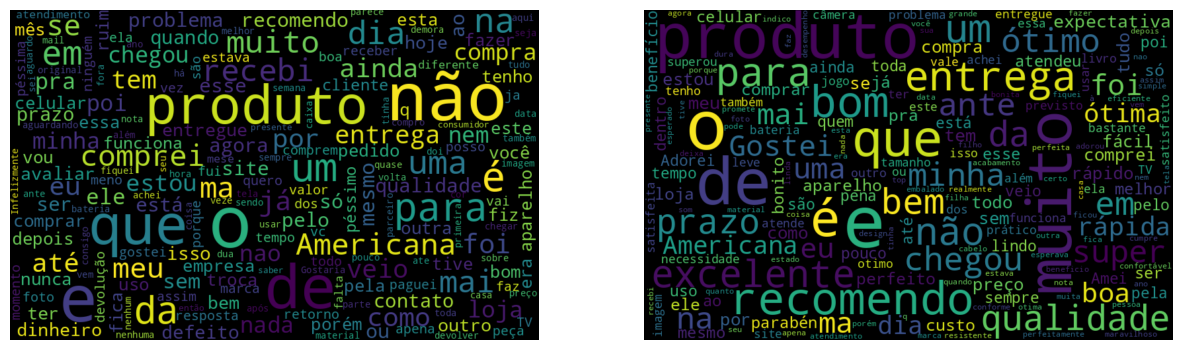

In [69]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(negative_wc, interpolation="bilinear")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(positive_wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [70]:
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [71]:
#remocao de stop words
from matplotlib import pyplot as plt
from nltk import tokenize, download
from nltk.corpus import stopwords
from wordcloud import WordCloud
from string import punctuation

processed_words = list()
brazilian_stop_words = stopwords.words('portuguese')

pontuction_text = list()
for p in punctuation:
  pontuction_text.append(p)

brazilian_stop_words_pontuation = brazilian_stop_words + pontuction_text

for text in avaliacoes.review_text:
  new_text = list()
  tokens = tokenize.WhitespaceTokenizer().tokenize(text)
  for word in tokens:
    if word not in brazilian_stop_words_pontuation:
      new_text.append(word)
  processed_words.append(' '.join(new_text))

avaliacoes["review_text_processed"] = processed_words

positive_aval = ' '.join([text for text in avaliacoes.query("polarity == 1").review_text_processed])
negative_aval = ' '.join([text for text in avaliacoes.query("polarity == 0").review_text_processed])
negative_wc = WordCloud(width=800, height=500, random_state=21, max_font_size=110, collocations=False).generate(negative_aval)
positive_wc = WordCloud(width=800, height=500, random_state=21, max_font_size=110, collocations=False).generate(positive_aval)


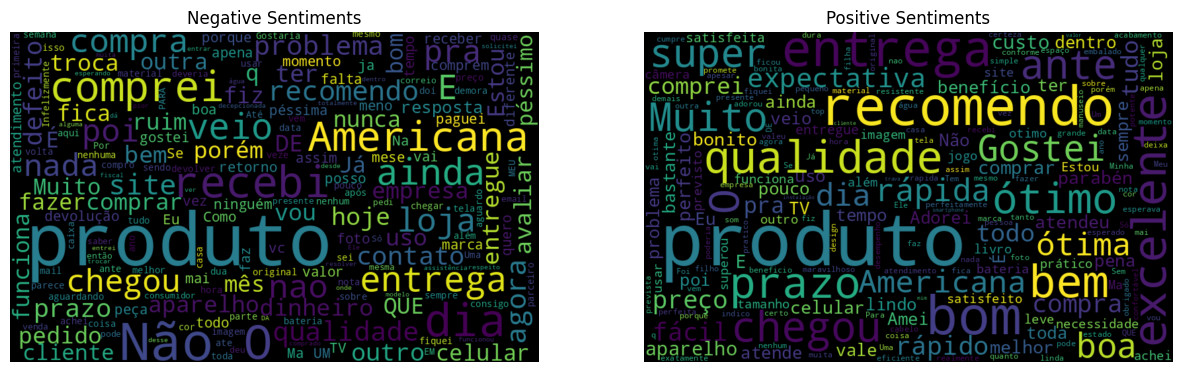

In [72]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(negative_wc, interpolation="bilinear")
plt.title("Negative Sentiments")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(positive_wc, interpolation="bilinear")
plt.title("Positive Sentiments")
plt.axis('off')
plt.show()